<a href="https://colab.research.google.com/github/aboutdouglas/Matplotlib/blob/main/Introdu%C3%A7%C3%A3o_ao_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

*   https://matplotlib.org/
*   Permite a criação desde visualizações estáticas mais simples, até gráficos mais complexos e elaborados.
*   Como dia a própria documentação, ele torna o que é fácil, fácil, e as coisas difíceis, possíveis de serem feitas!
*   Ela é bem completa e também útil para analytics.
*   Não possui tanta customização quanto outras bibliotecas e **pode deixar a desejar no apelo estético em alguns casos**.


# Pyplot

*   O Pyplot é o módulo do matplotlib que possui os gráficos básicos normalmente usados nessa biblioteca.
*   Vamos usar bastante o pyplot e, por isso, vamos importar diretamente esse módulo.



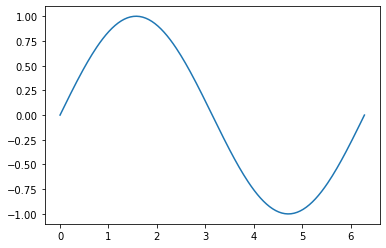

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [ ]:
# Importando o pyplot
import matplotlib.pyplot as plt

# Importando as outras bibliotecas
import numpy as np
import pandas as pd
import datetime as dt

Vamos usar a base do Instagram para aplicar todas as transformações

In [ ]:
# Importar a base em excel
from google.colab import drive
drive.mount('/content/drive')
base = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Hashtag/Analisando Engajamento Instagram/08. Analisando o engajamento no Instagram.xlsx')

# Apagando a coluna "Visualizações"
base = base.drop('Visualizações', axis=1)

# Agora vamos atribuir o valor N para essa coluna
base.loc[base.Carrossel.isnull(), 'Carrossel'] = 'N'

Mounted at /content/drive


In [ ]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


# Criando um plot no matplotlib

*   https://matplotlib.org/stable/plot_types/basic/plot.html



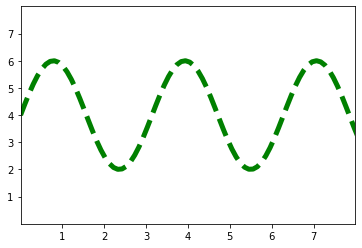

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, 'g--', linewidth=5.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
     ylim=(0, 8), yticks=np.arange(1, 8, ))

plt.show()

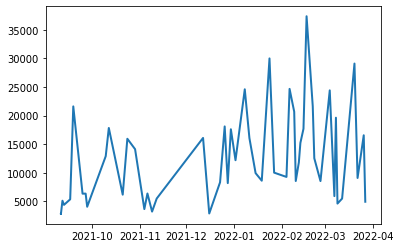

In [ ]:
# make data
x = base.Data
y = base.Curtidas

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.show()

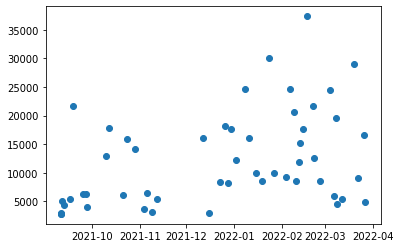

In [ ]:
# make data
x = base.Data
y = base.Curtidas

# plot
fig, ax = plt.subplots()

ax.scatter(x, y)

plt.show()

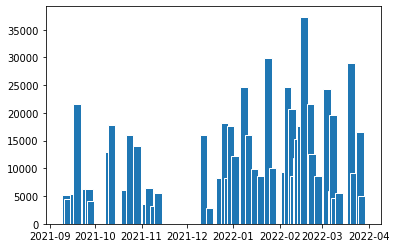

In [ ]:
# make data
x = base.Data
y = base.Curtidas

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=5, edgecolor='white')

plt.show()

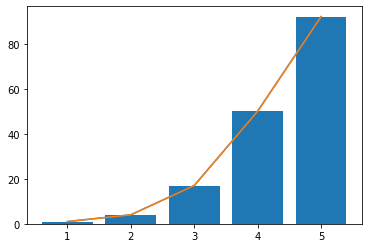

In [ ]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 17, 50, 92]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.bar(x, y)
ax.plot(x, y)

plt.show()

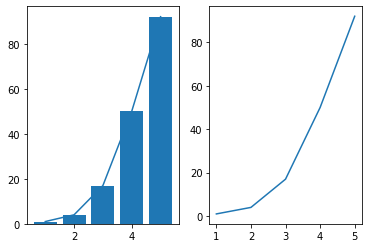

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(x, y)
ax[0].bar(x, y)
ax[1].plot(x, y)

plt.show()

# Será que existe uma tendência de queda nas curtidas?

*   Vamos fazer uma análise mensal
> Para isso, precisamos criar a coluna mês/ano




In [ ]:
# Criando a coluna do mês
base['mes'] = base.Data.dt.year*100 + base.Data.dt.month

# Verificando a coluna criada
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874,202109
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958,202109
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816,202109
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164,202109
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437,202109


In [ ]:
# Relembrando o groupby
media_mensal = base.groupby('mes')['Curtidas'].mean()
print(media_mensal)

mes
202109     6181.500000
202110    13390.400000
202111     4682.000000
202112    11863.833333
202201    15913.285714
202202    17081.363636
202203    13299.555556
Name: Curtidas, dtype: float64


In [ ]:
# O groupby vai ter o index
media_mensal.index

Int64Index([202109, 202110, 202111, 202112, 202201, 202202, 202203], dtype='int64', name='mes')

In [ ]:
# E os valores
media_mensal.values

array([ 6181.5       , 13390.4       ,  4682.        , 11863.83333333,
       15913.28571429, 17081.36363636, 13299.55555556])

E podemos usar exatamente essas informações para criar o nosso gráfico

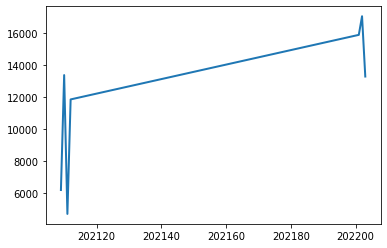

In [ ]:
# make data
x = media_mensal.index
y = media_mensal.values

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.show()

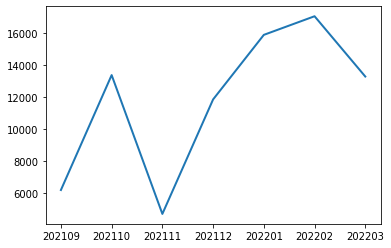

In [ ]:
# make data
x = media_mensal.index.astype(str)
y = media_mensal.values

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.show()

Adicionando novos dados nesse gráfico

In [ ]:
# Fazendo para o mínimo e máximo de curtidas
minimo = base.groupby('mes')['Curtidas'].min()
maximo = base.groupby('mes')['Curtidas'].max()

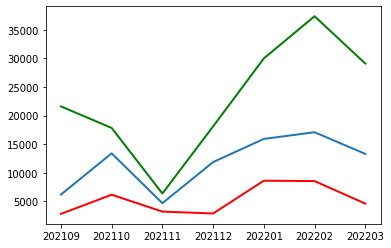

In [ ]:
# make data
x = media_mensal.index.astype(str)
y = media_mensal.values
x1 = minimo.index.astype(str)
y1 = minimo.values
x2 = maximo.index.astype(str)
y2 = maximo.values

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)
ax.plot(x1, y1, linewidth=2.0, color='r')
ax.plot(x2, y2, linewidth=2.0, color='g')

plt.show()

Entendendo os dados dos últimos 2 meses

In [ ]:
base[(base.mes >= 202202)].sort_values(['mes', 'Curtidas'],ascending=False)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563,202203
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665,202203
45,Reels,2022-03-08,19621,275,Trends,S,S,N,19896,202203
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737,202203
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193,202203
44,IGTV,2022-03-07,5918,116,Dicas de como usar/Novos Produtos,S,N,N,6034,202203
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,N,5566,202203
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,N,4999,202203
46,Foto,2022-03-09,4613,50,Influenciadores,S,N,N,4663,202203
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853,202202


Aconteceu um post patrocinado que aumentou muito as vendas de fevereiro.
Foi a única vez que tivemos post patrocinado? Vamos buscar isso nas tags.

*   Podemos usar o contains para procurar a palavra patrocinado nas tags
> Porém o contains não aceita se tiver valores NaN, então precisamos tratar isso antes


In [ ]:
# Tentando usar o contains sem tratar os valores NaN
base[base.Tags.str.contains('Promoções')]

ValueError: ignored

In [ ]:
# O '.fillna()' vai substituir os valores NaN pelo novo valor que passarmos
base.fillna('').tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,N,5566,202203
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563,202203
49,Foto,2022-03-22,9087,106,,S,S,N,9193,202203
50,Foto,2022-03-26,16551,186,,S,N,N,16737,202203
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,N,4999,202203


In [ ]:
# Então podemos usar o vazio apenas para visualizar todas as tags que possuem marcação de patrocinado
base[base.fillna('').Tags.str.contains('Promoções')]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
13,Foto,2021-10-24,15940,612,Promoções,S,N,N,16552,202110
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853,202202
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563,202203


In [ ]:
# Apagando a linha do post patrocinado
base = base.drop(39, axis=0)

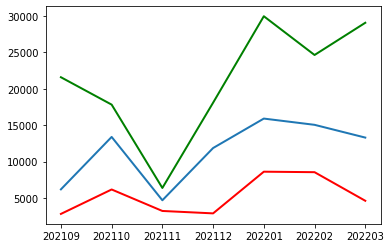

In [ ]:
# Refazendo os cálculos pra base sem o post patrocinado e refazendo o plot
media_mensal = base.groupby('mes')['Curtidas'].mean()
minimo = base.groupby('mes')['Curtidas'].min()
maximo = base.groupby('mes')['Curtidas'].max()

# make data
x = media_mensal.index.astype(str)
y = media_mensal.values
x1 = minimo.index.astype(str)
y1 = minimo.values
x2 = maximo.index.astype(str)
y2 = maximo.values

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)
ax.plot(x1, y1, linewidth=2.0, color='r')
ax.plot(x2, y2, linewidth=2.0, color='g')

plt.show()

# Como podemos visualizar as tags que mais impactaram o negócio?

In [ ]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874,202109
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958,202109
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816,202109
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164,202109
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437,202109


In [ ]:
baseTags = base
baseTags.Tags = baseTags.Tags.str.split('/')
baseTags = baseTags.explode('Tags')
baseTags.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874,202109
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958,202109
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958,202109
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816,202109
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164,202109


In [ ]:
baseTags.groupby('Tags')['Curtidas'].mean()

Tags
Datas comemorativas    20752.250000
Dicas de como usar      6833.400000
Influenciadores        15197.285714
Loja                    2865.000000
Novos Produtos         10304.888889
Produtos                6269.823529
Promoções              22512.000000
Trends                 20024.000000
Name: Curtidas, dtype: float64

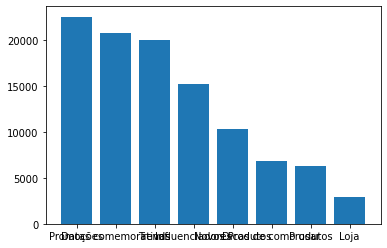

In [ ]:
# Fazendo o plot para tags
media = baseTags.groupby('Tags')['Curtidas'].mean().sort_values(ascending=False)

# make data
x = media.index
y = media.values


# plot
fig, ax = plt.subplots()

ax.bar(x, y, linewidth=2.0)

plt.show()

Para ajustar o eixo x, vamos usar o tick_params

*   https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.annotate.html

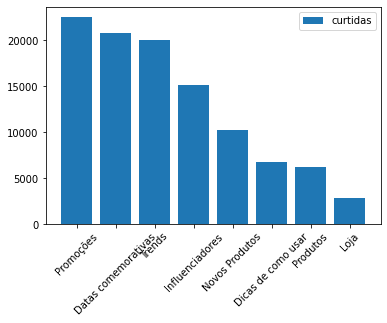

In [ ]:
# plot
fig, ax = plt.subplots()

ax.bar(x, y, label='curtidas')

# Rotacionando as legendas
ax.tick_params('x', labelrotation=45)

# Adicionando a legenda
ax.legend()

plt.show()

# Inserindo as quantidades de curtidas nos gráficos

*   Para isso, vamos usar o annotate

> https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.annotate.html

> Com ele, você consegue colocar qualquer texto no seu gráfico

> Basta usar: *plt.annotate('TEXTO',(x,y))*

*   Precisamos passar os argumentos:

> texto que vai ser escrito

> Posição (x,y) onde o texto vai estar

In [ ]:
y

array([22512.        , 20752.25      , 20024.        , 15197.28571429,
       10304.88888889,  6833.4       ,  6269.82352941,  2865.        ])

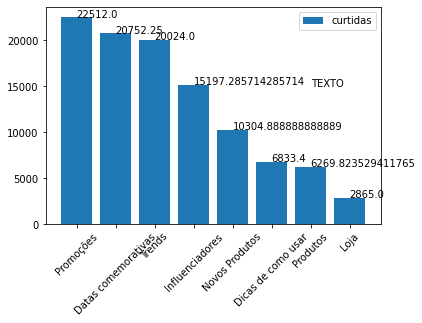

In [ ]:
# plot
fig, ax = plt.subplots()

ax.bar(x, y, label='curtidas')
ax.tick_params('x', labelrotation=45)
ax.legend()

plt.annotate('TEXTO',(6,15000))

for i in range(0, 8):
  plt.annotate(y[i], (i, y[i]))

plt.show()

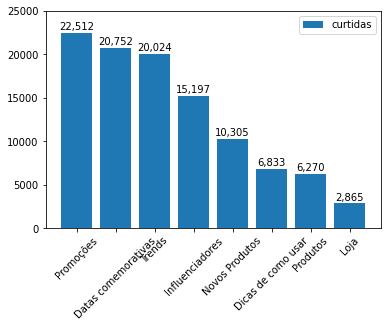

In [ ]:
#### Melhorando a formatação do annotate
# plot
fig, ax = plt.subplots()

ax.bar(x, y, label='curtidas')
ax.tick_params('x', labelrotation=45)
ax.legend()

# Colocando os valores nos gráficos
### Precisamos fazer um loop para ir colocando os valores em cada uma das barras
for i in np.arange(0,8):
  plt.annotate('{:,.0f}'.format(y[i]), # formatando o número
               (i,y[i]), # colocando a posição do elemento
               ha='center', # colocando a posição do elemento
               xytext=(0,3), # deslocamento x,y do texto
               textcoords='offset points' # referencial que vamos fazer o deslocamento
               )
  
ax.set(ylim=(0, 25000))

plt.show()

# Criando um scatter plot usando apenas a documentação

*   https://matplotlib.org/

> Plot Types

> scatter(x, y)










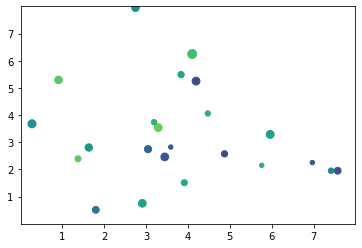

In [ ]:
# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))

# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
# Na parte dos dados, podemos usar a relação de curtidas x comentários
x = base.Curtidas
y = base.Comentários

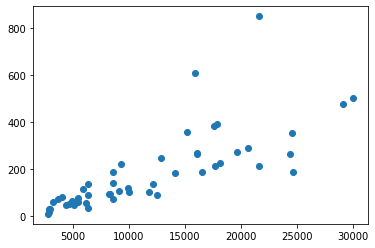

In [ ]:
# Depois, já podemos ir direto para o plot, usando apenas o básico
fig, ax = plt.subplots()

ax.scatter(x, y)

plt.show()

Podemos criar uma nova coluna para ser a cor, baseado no tipo de publicação

In [ ]:
base.Tipo.unique()

array(['Foto', 'Vídeo', 'Reels', 'IGTV'], dtype=object)

In [ ]:
def tipo_para_numero(tipo):
  if(tipo == 'Foto'):
    return 1
  elif(tipo == 'Vídeo'):
    return 2
  elif(tipo == 'Reels'):
    return 3
  elif(tipo == 'IGTV'):
    return 4

In [ ]:
base['NrTipo'] = base.Tipo.apply(tipo_para_numero)

In [ ]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes,NrTipo
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874,202109,1
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958,202109,1
2,Foto,2021-09-11,2807,9,[Loja],N,N,N,2816,202109,1
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,N,5164,202109,2
4,Foto,2021-09-13,4392,45,[Produtos],S,N,N,4437,202109,1


In [ ]:
colors = base.NrTipo

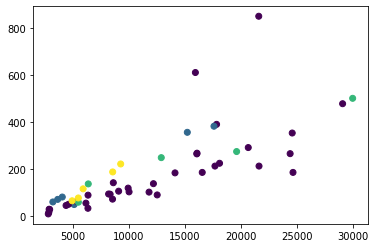

In [ ]:
# Depois já podemos ir direto pro plot, usando apenas o básico
fig, ax = plt.subplots()

ax.scatter(x, y, c=colors)

plt.show()

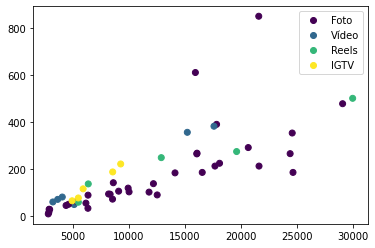

In [ ]:
### Dica: Podemos também adicionar a legenda em relação a cada um dos pontos
fig, ax = plt.subplots()

scatter_plot = ax.scatter(x, y, c=colors)

ax.legend(handles=scatter_plot.legend_elements()[0], labels=['Foto', 'Vídeo', 'Reels', 'IGTV'])

plt.show()